In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [5]:
df = pd.read_csv('data/Restaurant_Reviews.tsv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [45]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

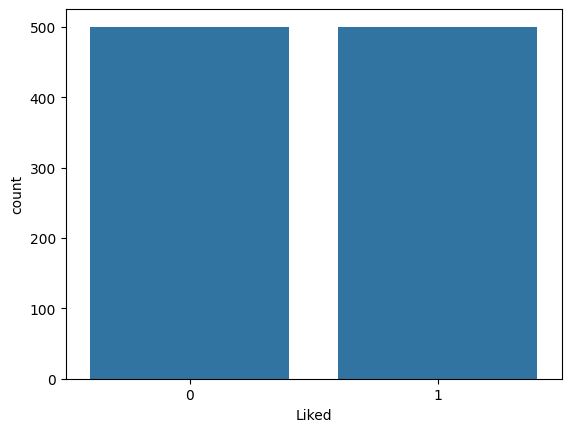

In [46]:
sns.countplot(x=df['Liked'])

In [48]:
df['Review'].apply(len)

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [49]:
len(df['Review'])

1000

In [7]:
df['Review Letter Counter']= df['Review'].apply(len)
df

,Review,Liked,Review Letter Counter
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [51]:
df['Review Letter Counter'].idxmax()

985

In [9]:
row = df.iloc[df['Review Letter Counter'].idxmax()]  # Get the row with max value
value_at_position_0 = row.iloc[0]
value_at_position_0 

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [55]:
row = df.iloc[df['Review Letter Counter'].idxmin()]  # Get the row with max value
value_at_position_0 = row.iloc[0]
value_at_position_0 

'DELICIOUS!!'

In [56]:
row = df.iloc[df['Review Letter Counter'].idxmax()]  # Get the row with max value
value_at_position_0 = row.iloc[0]
value_at_position_0 

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 1000 non-null   object
 1   Liked                  1000 non-null   int64 
 2   Review Letter Counter  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [59]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [76]:
df['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [61]:
df['Review'][0]

'Wow... Loved this place.'

In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
import nltk

In [13]:
from nltk.corpus import stopwords

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [80]:
s = df['Review'][0]
s

'Wow... Loved this place.'

In [81]:
import re
s = re.sub('[^a-zA-Z]'," ",s)
s

'Wow    Loved this place '

In [82]:
d = df['Review'][1]
d

'Crust is not good.'

In [105]:
import re
d = re.sub('[^a-zA-Z]'," ",d)
d

'Crust is not good '

In [84]:
s = s.lower()
s

'wow    loved this place '

In [85]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [86]:
temp =[]
for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['wow', 'loved', 'place']

In [87]:
[word for word in s if word not in stopwords.words('english')]

['wow', 'loved', 'place']

In [88]:
s= ' '.join(temp)
s

'wow loved place'

In [24]:
from nltk.stem import PorterStemmer

In [129]:
ps = PorterStemmer()

In [137]:
s = ps.stem(s)
s

'wow loved plac'

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()

In [92]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [143]:
#Putting together
corpus = []
for i in range(len(df)):
    s = re.sub('[^a-zA-Z]'," ",df['Review'][i])
    s = s.lower()
    s = s.split()
    s = [word for word in s if word not in stopwords.words('english')]
    s= ' '.join(s)
    s = ps.stem(s)
    corpus.append(s)
corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [145]:
cv = CountVectorizer()

In [147]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [148]:
cv.fit_transform(corpus).toarray().shape

(1000, 1994)

In [154]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [155]:
y = df['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [156]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
X_train.shape

(670, 1994)

In [162]:
X_test.shape

(330, 1994)

In [163]:
df.to_csv('Restaurant-Final.csv')

In [165]:
df['Not Liked']=df['Liked']==0
df

,Review,Liked,Review Letter Counter,Not Liked
0,Wow... Loved this place.,1,24,False
1,Crust is not good.,0,18,True
2,Not tasty and the texture was just nasty.,0,41,True
3,Stopped by during the late May bank holiday of...,1,87,False
4,The selection on the menu was great and so wer...,1,59,False
...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,True
996,Appetite instantly gone.,0,24,True
997,Overall I was not impressed and would not go b...,0,50,True
998,"The whole experience was underwhelming, and I ...",0,91,True


In [168]:
a=df['Not Liked'][0]
a

False

In [180]:
import re
for i in range(len(df)):
    df['Not Liked'][i] = re.sub('False', '0', str(df['Not Liked'][i]))

In [182]:
import re
for i in range(len(df)):
    df['Not Liked'][i] = re.sub('True', '1', str(df['Not Liked'][i]))

In [188]:
df

,Review,Liked,Review Letter Counter,Not Liked
0,Wow... Loved this place.,1,24,0
1,Crust is not good.,0,18,1
2,Not tasty and the texture was just nasty.,0,41,1
3,Stopped by during the late May bank holiday of...,1,87,0
4,The selection on the menu was great and so wer...,1,59,0
...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1
996,Appetite instantly gone.,0,24,1
997,Overall I was not impressed and would not go b...,0,50,1
998,"The whole experience was underwhelming, and I ...",0,91,1


In [192]:
df.columns.values[0] = 'Review'

In [197]:
countries = ['USA', 'Canada', 'Germany', 'France', 'Australia', 'India', 'China', 'Japan', 'Brazil', 'South Africa']

In [198]:
df['Country'] = [random.choice(countries) for _ in range(len(df))]

In [199]:
df

,Review,Liked,Review Letter Counter,Not Liked,Country
0,Wow... Loved this place.,1,24,0,Canada
1,Crust is not good.,0,18,1,China
2,Not tasty and the texture was just nasty.,0,41,1,USA
3,Stopped by during the late May bank holiday of...,1,87,0,South Africa
4,The selection on the menu was great and so wer...,1,59,0,Canada
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,China
996,Appetite instantly gone.,0,24,1,Japan
997,Overall I was not impressed and would not go b...,0,50,1,Canada
998,"The whole experience was underwhelming, and I ...",0,91,1,France


In [201]:
df.to_csv('Restaurant-Final0.csv')

In [202]:
df['Profit'] = [random.randint(1000, 9999) for _ in range(len(df))]
df

,Review,Liked,Review Letter Counter,Not Liked,Country,Profit
0,Wow... Loved this place.,1,24,0,Canada,5675
1,Crust is not good.,0,18,1,China,1746
2,Not tasty and the texture was just nasty.,0,41,1,USA,5129
3,Stopped by during the late May bank holiday of...,1,87,0,South Africa,3763
4,The selection on the menu was great and so wer...,1,59,0,Canada,3623
...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,China,1594
996,Appetite instantly gone.,0,24,1,Japan,1823
997,Overall I was not impressed and would not go b...,0,50,1,Canada,1928
998,"The whole experience was underwhelming, and I ...",0,91,1,France,4228


In [210]:
def categorize(value):
    if value > 5000:
        return 'High'
    elif value > 2000:
        return 'Medium'
    else:
        return 'Low'

df['Category'] = df['Profit'].apply(categorize)
df

,Review,Liked,Review Letter Counter,Not Liked,Country,Profit,Category,Gender
0,Wow... Loved this place.,1,24,0,Canada,5675,High,Male
1,Crust is not good.,0,18,1,China,1746,Low,Female
2,Not tasty and the texture was just nasty.,0,41,1,USA,5129,High,Female
3,Stopped by during the late May bank holiday of...,1,87,0,South Africa,3763,Medium,Female
4,The selection on the menu was great and so wer...,1,59,0,Canada,3623,Medium,Female
...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,China,1594,Low,Male
996,Appetite instantly gone.,0,24,1,Japan,1823,Low,Male
997,Overall I was not impressed and would not go b...,0,50,1,Canada,1928,Low,Male
998,"The whole experience was underwhelming, and I ...",0,91,1,France,4228,Medium,Male


In [211]:
genders = ['Male', 'Female']
df['Gender'] = [random.choice(genders) for _ in range(len(df))]
df

,Review,Liked,Review Letter Counter,Not Liked,Country,Profit,Category,Gender
0,Wow... Loved this place.,1,24,0,Canada,5675,High,Male
1,Crust is not good.,0,18,1,China,1746,Low,Female
2,Not tasty and the texture was just nasty.,0,41,1,USA,5129,High,Male
3,Stopped by during the late May bank holiday of...,1,87,0,South Africa,3763,Medium,Female
4,The selection on the menu was great and so wer...,1,59,0,Canada,3623,Medium,Male
...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,China,1594,Low,Female
996,Appetite instantly gone.,0,24,1,Japan,1823,Low,Female
997,Overall I was not impressed and would not go b...,0,50,1,Canada,1928,Low,Male
998,"The whole experience was underwhelming, and I ...",0,91,1,France,4228,Medium,Female


In [214]:
payments_methods= ['cash', 'credit card', 'mobile payment']
df['Payments_methods']=[random.choice(payments_methods) for i in range(len(df))]
df

,Review,Liked,Review Letter Counter,Not Liked,Country,Profit,Category,Gender,Payments_methods
0,Wow... Loved this place.,1,24,0,Canada,5675,High,Male,cash
1,Crust is not good.,0,18,1,China,1746,Low,Female,mobile payment
2,Not tasty and the texture was just nasty.,0,41,1,USA,5129,High,Male,mobile payment
3,Stopped by during the late May bank holiday of...,1,87,0,South Africa,3763,Medium,Female,mobile payment
4,The selection on the menu was great and so wer...,1,59,0,Canada,3623,Medium,Male,cash
...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,China,1594,Low,Female,credit card
996,Appetite instantly gone.,0,24,1,Japan,1823,Low,Female,mobile payment
997,Overall I was not impressed and would not go b...,0,50,1,Canada,1928,Low,Male,mobile payment
998,"The whole experience was underwhelming, and I ...",0,91,1,France,4228,Medium,Female,mobile payment


In [216]:
years = [2020, 2021, 2022, 2023, 2024]
df['Year'] = [random.choice(years) for _ in range(len(df))]
df

,Review,Liked,Review Letter Counter,Not Liked,Country,Profit,Category,Gender,Payments_methods,Year
0,Wow... Loved this place.,1,24,0,Canada,5675,High,Male,cash,2020
1,Crust is not good.,0,18,1,China,1746,Low,Female,mobile payment,2021
2,Not tasty and the texture was just nasty.,0,41,1,USA,5129,High,Male,mobile payment,2020
3,Stopped by during the late May bank holiday of...,1,87,0,South Africa,3763,Medium,Female,mobile payment,2020
4,The selection on the menu was great and so wer...,1,59,0,Canada,3623,Medium,Male,cash,2020
...,...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,China,1594,Low,Female,credit card,2023
996,Appetite instantly gone.,0,24,1,Japan,1823,Low,Female,mobile payment,2020
997,Overall I was not impressed and would not go b...,0,50,1,Canada,1928,Low,Male,mobile payment,2021
998,"The whole experience was underwhelming, and I ...",0,91,1,France,4228,Medium,Female,mobile payment,2021


In [218]:
df.to_csv('Restaurant-Final.csv')